In [23]:
# import pandas as pd
# import numpy as np
# import models.fourLayer
from models.fourLayer import *

# data = pd.read_csv('train.csv')
# # print(data)
# data = np.array(data)
# m ,n = data.shape
# np.random.shuffle(data)
# print(data.shape)

# # test.shape = (784,1)
# # test = np.array(list(map(lambda el:[el], test)))
# # print(test)
# # test = transform.resize(test, (1, 784))

# def min_max_normalize(set : np.array):
#     return (set - np.min(set))/(np.max(set) - np.min(set))

# # data_train = data.T
# # print(data)
# data_train = data[0:int(2*m/3)].T
# labels_train = data_train[0]
# x_train = data_train[1:n]
# # print(x_train.shape)
# x_train = min_max_normalize(x_train).round()

# data_test = data[int(2*m/3):m].T
# labels_test = data_test[0]
# x_test = data_test[1:n]
# x_test = min_max_normalize(x_test).round()

# # x_test = x_test.join(test.T)



# # x_train = x_train / 255.0
# # np.random.shuffle(x_train)
# # print(f'labels {labels_train}')
# # print(x_train)

# # x_train.shape
# layer2 = 128
# layer3 = 64
# def init_params():
#     print('initializing...')
#     w1 = np.random.rand(layer2,784) - 0.5
#     b1 = np.random.rand(layer2,1) - 0.5
#     w2 = np.random.rand(layer3,layer2) - 0.5
#     b2 = np.random.rand(layer3,1) - 0.5
#     w3 = np.random.rand(10,layer3)- 0.5
#     b3 = np.random.rand(10,1)- 0.5
#     print(w1.shape, b1.shape)
#     return w1, b1, w2, b2, w3, b3

# def RelU(z):
#     relU = np.maximum(z, 0)
#     return relU

# def sigmoid(z):
#     e_negx = np.exp(-z)
#     sigmoid = 1 / (1 + e_negx)
#     return sigmoid

# def softmax(z):
#     e_z = np.exp(z)
#     softmax = e_z/sum(e_z)
#     return softmax

# def forward_prop(x,w1,b1,w2,b2,w3,b3):
#     z1 = w1.dot(x) + b1
#     a1 = RelU(z1)
#     z2 = w2.dot(a1) + b2
#     # a2 = RelU(z2)
#     a2 = sigmoid(z2)
#     z3 = w3.dot(a2) + b3
#     a3 = softmax(z3)
#     # print(a2.shape)
    
#     return z1, a1, z2, a2, z3, a3


# def one_hot(y):
#     one_hot = np.zeros((y.size, y.max() + 1))
#     one_hot[np.arange(y.size), y] = 1
#     one_hot = one_hot.T
#     return one_hot

# def deriv_RelU(z):
#     return z > 0
#     # return np.where(z > 0, 1, 0)

# def deriv_sigmoid(z):
#     sig = sigmoid(z)
#     deriv = sig*(1-sig)
#     return deriv



# def back_prop(a1, w1, z1, a2, w2, z2, a3, w3, z3, x, y):
#     one_hot_y = one_hot(y)
    
#     m = y.size
# #     C0 = np.zeroes(10,1)
#     dz3 = a3 - one_hot_y
#     # print(error2[0])
#     dw3 = dz3.dot(a2.T)/m
#     db3 = np.sum(dz3)/m

#     # error2 = w3.T.dot(dz3) * deriv_RelU(z2)
#     error2 = w3.T.dot(dz3) * deriv_sigmoid(z2)
#     dw2 = error2.dot(a1.T)/m
#     db2 = np.sum(error2)/m

#     error1 = w2.T.dot(error2) * deriv_RelU(z1)
#     dw1 = error1.dot(x.T)/m
#     db1 = np.sum(error1)/m
    
#     return dw1, db1, dw2, db2, dw3, db3


# def update_params(w1, b1, w2, b2, w3, b3, dw1, db1, dw2, db2, dw3, db3, rate):
# #     print(f'first : w1, b1, w2, b2 : {w1} {b1} {w2} {b2}')
#     w1 = w1 - rate * dw1
#     b1 = b1 - rate * db1
#     w2 = w2 - rate * dw2
#     b2 = b2 - rate * db2
#     w3 = w3 - rate * dw3
#     b3 = b3 - rate * db3
    
# #     print(f'changed: w1, b1, w2, b2 : {w1} {b1} {w2} {b2}')

#     return w1, b1, w2, b2, w3, b3, dw1, dw2, dw3

# def get_predictions(a):
#     return np.argmax(a, 0)

# def get_accuracy(predictions, y):
#     return np.sum(predictions == y)  / y.size, np.sum(y**2-predictions**2) / y.size




In [24]:
# # import itertools
# def calc_momentum(d_v, d, beta, iteration=None):
#     d_v = beta*d_v + (1-beta)*d
#     m_hat = d_v/(1- beta**iteration)
#     return m_hat

# def calc_velocity(d_v, d, beta, iteration=None):
#     d_v = beta*d_v + (1-beta)*(np.square(d))
#     v_hat = d_v/(1- beta**iteration)
#     return v_hat

# def adam(dw, mom_b, vel_b, velocity, momentum, iteration):
#     epsilon = 1e-8
#     # momentum = mom_b*momentum + (1-mom_b)*dw
#     m_hat = calc_momentum(momentum, dw, mom_b, iteration)
#     # velocity = vel_b*velocity + (1-vel_b)*(dw**2)
#     # m_hat = momentum/(1- mom_b**iteration)
#     # v_hat = velocity/(1- vel_b**iteration)
#     v_hat = calc_velocity(velocity, dw, vel_b, iteration)

#     return m_hat/(np.sqrt(v_hat) + epsilon), v_hat, m_hat
#     # return m_hat, v_hat

# def adam_gradient_descent(x, y, rate, iteration, vw1, mw1, vw2, mw2, vw3, mw3, w1=None, b1=None, w2=None, b2=None, w3=None, b3=None):
    

#     # pdw1, pdw2, pdw3 = dw1, dw2, dw3
#     z1, a1, z2, a2, z3, a3 = forward_prop(x, w1, b1, w2, b2, w3, b3)
#     dw1, db1, dw2, db2, dw3, db3 = back_prop(a1, w1, z1, a2, w2, z2, a3, w3, z3, x, y)
    
#     mom_beta = 0.9
#     vel_beta = 0.999
 

#     dw1, vw1, mw1 = adam(w1, mom_beta, vel_beta, vw1, mw1, iteration)
#     dw2, vw2, mw2 = adam(w2, mom_beta, vel_beta, vw2, mw2, iteration)
#     dw3, vw3, mw3 = adam(w3, mom_beta, vel_beta, vw3, mw3, iteration)

#     w1, b1, w2, b2, w3, b3, _, _, _ = update_params(w1, b1, w2, b2, w3, b3, dw1, db1, dw2, db2, dw3, db3, rate)

#     return w1, b1, w2, b2, w3, b3, a3, vw1, mw1, vw2, mw2, vw3, mw3


# def gradient_descent(x, y, rate, iteration, momentum=True, decay=.95, w1=None, b1=None, w2=None, b2=None, w3=None, b3=None, v_dw1=0, v_dw2=0, v_dw3=0, v_db1=0, v_db2=0, v_db3=0):
    

#     # pdw1, pdw2, pdw3 = dw1, dw2, dw3
#     z1, a1, z2, a2, z3, a3 = forward_prop(x, w1, b1, w2, b2, w3, b3)
#     dw1, db1, dw2, db2, dw3, db3 = back_prop(a1, w1, z1, a2, w2, z2, a3, w3, z3, x, y)
#     w1, b1, w2, b2, w3, b3, dw1, dw2, dw3 = update_params(w1, b1, w2, b2, w3, b3, dw1, db1, dw2, db2, dw3, db3, rate)
#     beta = 0.9
    
#     if momentum:
#         v_dw1 = calc_momentum(v_dw1, dw1, beta, iteration)
#         v_dw2 = calc_momentum(v_dw2, dw2, beta, iteration)
#         v_dw3 = calc_momentum(v_dw3, dw3, beta, iteration)
#         v_db1 = calc_momentum(v_db1, b1, beta, iteration)
#         v_db2 = calc_momentum(v_db2, b2, beta, iteration)
#         v_db3 = calc_momentum(v_db3, b3, beta, iteration)
    
#         # if v_dw == None:
#         #     pdw1 = 0
#         #     pdw2 = 0
#         #     pdw3 = 0     
#         # # print(pdw1)
#         w1 = w1 - decay*v_dw1
#         w2 = w2 - decay*v_dw2
#         w3 = w3 - decay*v_dw3
#         b1 = b1 - decay*v_db1
#         b2 = b2 - decay*v_db2
#         b3 = b3 - decay*v_db3
        

#     return w1, b1, w2, b2, w3, b3, a3, v_dw1, v_dw2, v_dw3, v_db1, v_db2, v_db3
# # `   34QW2`

In [25]:

# def minibatchGD(x, y, epochs, rate, batch_size=128,optimizer='', validation=[], validKey='' ,w1=None, b1=None, w2=None, b2=None, w3=None, b3=None, sudoku=None, key=None):
#     xLoss = []
#     yAcc = []
#     validationLoss = []
#     validationAcc = []
#     # print(y.shape)
#     # sudokuLoss = None
#     # if sudoku != None:
#     # if:
#     sudokuLoss = []
#     sudokuAcc = []

#     load = '----------------------------------------------------------|'
#     if not isinstance(w1, np.ndarray):
#         w1, b1, w2, b2, w3, b3 = init_params()
    
    
#     for epoch in range(epochs):
#         pos = 0
#         iteration = 0
#         vw1 = np.zeros_like(w1) 
#         mw1 = np.zeros_like(w1)
#         vw2 = np.zeros_like(w2) 
#         mw2 = np.zeros_like(w2)
#         vw3 = np.zeros_like(w3) 
#         mw3 = np.zeros_like(w3)
#         vb1 = np.zeros_like(b1) 
#         vb2 = np.zeros_like(b2)     
#         vb3 = np.zeros_like(b3) 
#         # 
#         while pos < batch_size:
#             iteration+=1
#             batchX = x.T[pos:pos+batch_size].T
#             batchY = y.T[pos:pos+batch_size].T
#             # batchYpreds = 
#             # display(x.shape, batchX.shape)
#             # display(y.shape, batchY.shape)
#             pos = pos + batch_size
#             dist = int((len(load)*epoch)/epochs)
#             bar = ['*']*dist
#             loader = [*load]
#             loader[0:dist] = bar
#             load = ''.join(loader)

#             # batch = x.T[pos:epoch*batch_size].T
#             if optimizer == "adam":
#                 w1, b1, w2, b2, w3, b3, a3, vw1, mw1, vw2, mw2, vw3, mw3 = adam_gradient_descent(x=batchX, y=batchY, rate=rate, w1=w1, b1=b1, w2=w2, b2=b2, w3=w3, b3=b3,vw1=vw1, mw1=mw1, vw2=vw2, mw2=mw2, vw3=vw3, mw3=mw3, iteration=iteration)
#             else:
#                 w1, b1, w2, b2, w3, b3, a3, vw1, vw2, vw3, vb1, vb2, vb3 = gradient_descent(x=batchX, y=batchY, rate=rate, iteration=iteration, w1=w1, b1=b1, w2=w2, b2=b2, w3=w3, b3=b3, v_dw1=vw1, v_dw2=vw2, v_dw3=vw3, v_db1=vb1, v_db2=vb2, v_db3=vb3)
#             # print(a3.shape, batchY.shape)
#             accuracy, loss = get_accuracy(get_predictions(a3), batchY)
#             xLoss.append(loss)
#             yAcc.append(accuracy)
            
#             # print('val', validation.shape, 'w1', w1.shape, 'b1', b1.shape)
            
#             acc, val_loss = get_accuracy(make_predictions(validation, w1, b1, w2, b2, w3, b3), validKey)
#             validationLoss.append(val_loss)
#             validationAcc.append(acc)

#             if sudoku is not None:
#                 sudoku_acc, sudoku_loss = get_accuracy(make_predictions(sudoku, w1, b1, w2, b2, w3, b3), key)
#                 sudokuLoss.append(sudoku_loss)
#                 sudokuAcc.append(sudoku_acc)



#             if epoch < epochs-1:
#                 print('\r', f'[{epoch}/{epochs}] {load} {accuracy} {loss}', end='')
#             else:
#                 print(f'{load} {accuracy} {loss} complete')

#     return w1, b1, w2, b2, w3, b3, np.array(xLoss), np.array(yAcc), np.array(validationLoss), np.array(validationAcc), np.array(sudokuLoss), np.array(sudokuAcc)

# def make_predictions(x, w1, b1, w2, b2, w3, b3):
#     _, _, _, _, _, a3 = forward_prop(x, w1, b1, w2, b2, w3, b3)
#     predictions = get_predictions(a3)
#     return predictions

# # minibatchGD(x_train, y_label,2,2,2)





In [26]:
# from skimage import io, transform, color
# import cv2


# image = cv2.imread('boards/board.png')
# # if image.shape[2] == 4:
# #     image = color.rgb2gray(color.rgba2rgb(image))
# # else: 
# #     image = color.rgb2gray(image)
# image = cv2.bitwise_not(image)
# image = color.rgb2gray(image)
# # print(np.array(image).shape)

# # image = transform.resize(image, (28, 28))
# #


# def split_grid(image : np.array):
#     m, n = image.shape
#     one = image[0:int(m/3),0:int(n/3)]
#     two = image[0:int(m/3),int(n/3):int(2*n/3)]
#     three = image[0:int(m/3),int(2*n/3):n]

#     four = image[int(m/3):int(2*m/3),0:int(n/3)]
#     five = image[int(m/3):int(2*m/3),int(n/3):int(2*n/3)]
#     six = image[int(m/3):int(2*m/3),int(2*n/3):n]

#     seven = image[int(2*m/3):int(m),0:int(n/3)]
#     eight = image[int(2*m/3):int(m),int(n/3):int(2*n/3)]
#     nine = image[int(2*m/3):int(m),int(2*n/3):n]

#     return one, two, three, four, five, six, seven, eight, nine

# squares = list(split_grid(image))
# nine = squares[8]
# spaces = list(split_grid(nine))


# def get_pixels(image : np.array, show = False):
#     image = transform.resize(image, (28, 28))
#     pixels = np.array(image.flatten())
#     if show: 
#         print(pixels)

#     return image, np.array([pixels])

# squares = list(split_grid(image))



# print(image2.shape)
# io.imshow(image2)
# io.show()

In [27]:


from boardWork import *

grid_labels = [0, 7, 0, 0, 0, 0,0,3,0,8,3,0,4,0,0,0,0,0,0,4,1,0,0,7,0,0,0,0,4,0,0,2,1,0,0,5,7,0,0,3,0,0,0,0,0,0,6,0,4,0,8,0,0,0,9,0,0,0,0,8,0,0,0,0,0,5,0,0,0,0,0,0,2,8,0,0,0,0,1,0,9]
print(len(grid_labels))
# def format_board(test):
#     image = cv2.imread('boards/board.png')
#     image = cv2.bitwise_not(image)

#     image = color.rgb2gray(image)
#     # image = image.round()

#     io.imshow(image)
#     io.show()

#     grids = list(split_grid(image))
#     mini_grids = []
#     for grid in grids:
#         spaces = list(split_grid(grid))
#         mini_grids.append(spaces)
#         for space in spaces:
#             # io.imshow(space)
#             # io.show()
#             # label = grid_labels[i]
#             test = add_to_test(test, get_pixels(space)[1])

#     return mini_grids, test

81


In [28]:

digits = []
# digit_test = []
print('loading files...')
i = 0
for folder in os.listdir(directory):
    f = os.path.join(directory, folder)
    count = 0


    # print(f)
    for file in os.listdir(f):
        count = count + 1
        picture = None
        file_name = os.path.join(f, file)
        if os.path.isfile(file_name):
            picture = cv2.imread(file_name)
            picture = color.rgb2gray(picture)

            _, pixels = get_pixels(picture)
            pixels = pixels
            label = int(file_name[7])
            _, digits = create_entry(pixels, label, digits)


# for grid in mini_grids
    print(f'{i} : {count} entries\n')
    i = i+1



                # print(digits)
                # io.imshow()
                # io.show()
                # print(label, len(entry))
    
    
# digits = np.array(digits)
# print(digits.shape)

# print(digit_test.shape)


# one = digits[0:2]

loading files...
0 : 514 entries

1 : 1496 entries

2 : 1480 entries

3 : 1204 entries

4 : 1088 entries

5 : 731 entries

6 : 1056 entries

7 : 1400 entries

8 : 1166 entries

9 : 1069 entries



test size (784, 28000)


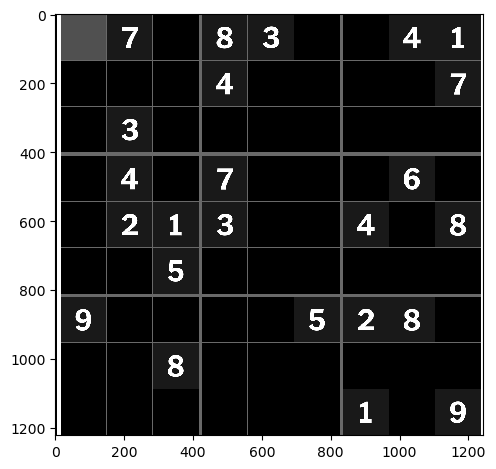

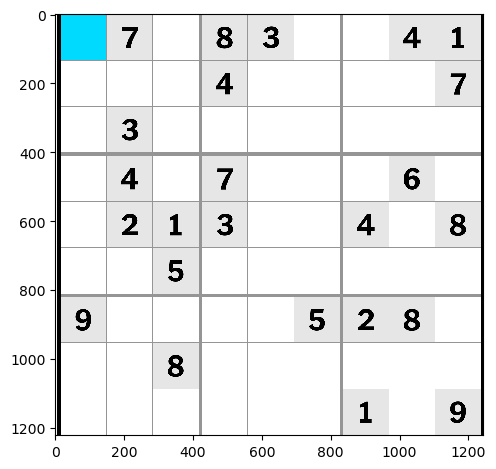

board shape (784, 81)
i:  0 labels:  [0, 7, 0, 0, 0, 0, 0, 3, 0]
i:  1 labels:  [8, 3, 0, 4, 0, 0, 0, 0, 0]
i:  2 labels:  [0, 4, 1, 0, 0, 7, 0, 0, 0]
i:  3 labels:  [0, 4, 0, 0, 2, 1, 0, 0, 5]
i:  4 labels:  [7, 0, 0, 3, 0, 0, 0, 0, 0]
i:  5 labels:  [0, 6, 0, 4, 0, 8, 0, 0, 0]
i:  6 labels:  [9, 0, 0, 0, 0, 8, 0, 0, 0]
i:  7 labels:  [0, 0, 5, 0, 0, 0, 0, 0, 0]
i:  8 labels:  [2, 8, 0, 0, 0, 0, 1, 0, 9]
done
digits shape (11285, 785)


In [29]:


test = np.array(pd.read_csv('test.csv')).T
test = min_max_normalize(test)
print('test size' , test.shape)

board_path = 'boards/board.png'
grids, test, board = format_board(board_path, test)

io.imshow(board)
io.show()
# print(grids)
# print('test size' , test.shape)


m, n = test.shape
board_squares = test[:, 28000:n]
print("board shape", board_squares.shape)
board_squares = board_squares.round()

for i, grid in enumerate(grids):
    labels = grid_labels[i*9:i*9+9]
    print('i: ', i, 'labels: ', labels)
    for space, label in zip(grid, labels):
        # io.imshow(space)
        # io.show()
        # print(label)
        # print(len(space))
        _, pixels = get_pixels(space)
        _, digits = create_entry(pixels, label, digits)
print("done")
        
# digit_test = np.array(digit_test)
grid_labels = np.array(grid_labels)
digits = np.array(digits)
print("digits shape", digits.shape)





(11285, 785)


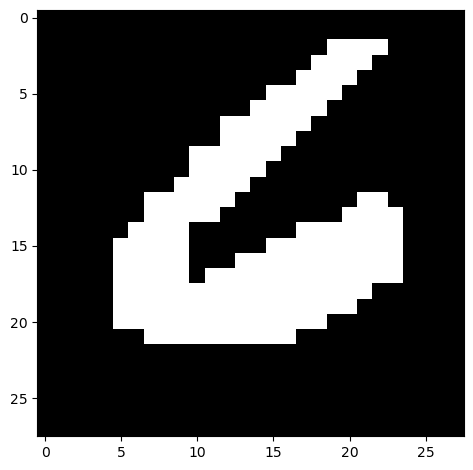

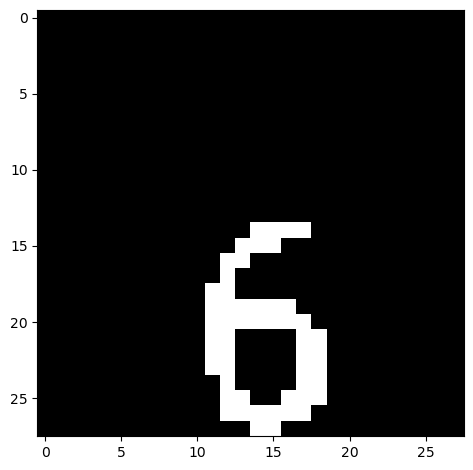

(785, 7523)

(784, 3762) (3762,)


In [30]:
np.random.shuffle(digits)
# np.random.shuffle(digit_test)
print(digits.shape)
m, n = digits.shape
digits = digits.round()
digit_train = digits[0:int(2*m/3)].T
# digit_train = digits.T
digit_labels = digit_train[-1]
x_digit_train = digit_train[0:n-1]
first_digit = x_digit_train[:,-1]
first = x_train[:,1]

# m, n = digit_test.shape
digit_test = digits[int(2*m/3):m].T
# test_digits = digit_test.T
digit_test_labels = digit_test[-1]
x_digit_test = digit_test[0:n-1]

# first_digit_test = x_digit_test[:,-1]
# display(first_digit_test, first_digit_test.shape)

# x_digit_train = min_max_normalize(digit_train[0:n-1])
# print(first_digit[first_digit != 0], first[first != 0], first_digit.shape == first.shape)
# first = first.round()
io.imshow(first.reshape(28,28))
io.show()
io.imshow(first_digit.reshape(28,28))
io.show()
# io.imshow(first_digit_test.reshape(28,28))
io.show()

display(digit_train.shape)

print(x_digit_test.shape, digit_test_labels.shape)




In [31]:


# print(space[space != 0], len(board_squares[:,0]))
# data_train = data[0:int(2*m/3)].T

In [32]:
# print(type(grids))


In [33]:
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

mnist_rate = 0.07
# iters = 500
# iters = 80
print(x_train.shape, x_test.shape)

# w1, b1, w2, b2, w3, b3, lossY, accY, validationLoss, validationAcc, _, _ = minibatchGD(x=x_train, y=labels_train,  epochs=1200, rate=mnist_rate, batch_size=int(x_train.shape[1]), validation=x_test, validKey=labels_test)
# w1, b1, w2, b2, w3, b3, lossY, accY, validationLoss, validationAcc, _, _ = minibatchGD(x=x_train, y=labels_train, epochs=25, batch_size=2048, rate=mnist_rate, validation=x_test, validKey=labels_test)

# preds = make_predictions(x_test, w1, b1, w2, b2, w3, b3)
# display(preds)
# display(labels_test)
# mnist_acc, mnist_loss = get_accuracy(preds, labels_test)
# print(f'test accuracy : {get_accuracy(preds, labels_test)}')
# 
# # display(lossY)
# plt.plot(lossY, label='loss')
# plt.plot(validationLoss, label='validation')
# plt.title('Loss')
# plt.legend()
# plt.show()
# plt.plot(accY*100, label='train')
# plt.plot(validationAcc*100, label='validation')
# plt.legend()
# plt.title('Accuracy')
# plt.show()
# 
# # firstY = 
# 
# confusion = confusion_matrix(preds, labels_test)
# disp = ConfusionMatrixDisplay(confusion_matrix=confusion, display_labels=[0,1,2,3,4,5,6,7,8,9])
# disp.plot(cmap='hot')


# prev : 800



# # print(w1, b1, w2, b2, w3, b3)
 

(784, 28000) (784, 14000)


In [34]:
digit_rate = .07
# w1, b1, w2, b2, w3, b3, digiLossY, accY, validationLoss, validationAcc, sudokuLoss, sudokuAcc = minibatchGD(x=x_digit_train, y=digit_labels.astype(int), epochs=600, batch_size=int(x_digit_train.shape[1]), validation=x_digit_test, rate=digit_rate, w1=w1, b1=b1, w2=w2, b2=b2, w3=w3, b3=b3,sudoku=board_squares, key=grid_labels, validKey=digit_test_labels)
# w1, b1, w2, b2, w3, b3, digiLossY, accY, validationLoss, validationAcc, sudokuLoss, sudokuAcc = minibatchGD(x=x_digit_train, y=digit_labels.astype(int), epochs=30, batch_size=2048, validation=x_digit_test, validKey=digit_test_labels, rate=digit_rate, w1=w1, b1=b1, w2=w2, b2=b2, w3=w3, b3=b3, sudoku=board_squares, key=grid_labels)
# w1, b1, w2, b2, w3, b3, digiLossY2, accY2 = gradient_descent(x_digit_train, digit_labels.astype(int), 1000, digit_rate-.01, w1, b1, w2, b2, w3, b3)
# w1, b1, w2, b2, w3, b3, digiLossY3, accY3 = gradient_descent(x_digit_train, digit_labels.astype(int), 300, .07, w1, b1, w2, b2, w3, b3)




w1, b1, w2, b2, w3, b3 = get_weights()
# print(b1.shape, b2.shape, b3.shape)
# b1.reshape(b1.shape[0], 1)

# print(b1.shape, b2.shape, b3.shape)
print(w1.shape, w2.shape, w3.shape)
print(labels_train)

preds = make_predictions(x_digit_test, w1, b1, w2, b2, w3, b3)

print(f'test accuracy : {get_accuracy(preds, digit_test_labels)}')

# plt.plot(digiLossY, label='train')
# plt.plot(validationLoss, label='validation')
# plt.plot(sudokuLoss, label='sudoku')
# plt.legend()
# plt.title('Loss')
# plt.show()
# plt.plot(accY*100, label='train')
# plt.plot(validationAcc*100,label='validation')
# plt.plot(sudokuAcc*100,label='suoko')
# plt.legend()
# plt.title('Accuracy')
# plt.show()



(128, 784) (64, 128) (10, 64)
[3 6 3 ... 1 2 8]
test accuracy : (0.9598617756512493, -0.14088250930356194)


In [35]:
# plt.plot(digiLossY, label='train')
# plt.plot(validationLoss, label='validation')
# plt.plot(sudokuLoss, label='sudoku')
# plt.legend()
# plt.title('Loss')
# plt.show()
# plt.plot(accY*100, label='train')
# plt.plot(validationAcc*100,label='validation')
# plt.plot(sudokuAcc*100,label='sudoku')
# plt.legend()
# plt.title('Accuracy')
# plt.show()


# confusion = confusion_matrix(preds, digit_test_labels)
# disp = ConfusionMatrixDisplay(confusion_matrix=confusion, display_labels=[0,1,2,3,4,5,6,7,8,9])
# disp.plot(cmap='hot')

[0 7 0 0 0 0 0 3 0 8 3 0 4 0 0 0 0 0 0 4 1 0 0 7 0 0 0 0 4 0 0 2 1 0 0 5 7
 0 0 3 0 0 0 0 0 0 6 0 4 0 8 0 0 0 9 0 0 0 0 8 0 0 0 0 0 5 0 0 0 0 0 0 2 8
 0 0 0 0 1 0 9] 
 [0 7 0 0 0 0 0 3 0 8 3 0 4 0 0 0 0 0 0 4 1 0 0 7 0 0 0 0 4 0 0 2 1 0 0 5 7
 0 0 3 0 0 0 0 0 0 6 0 4 0 8 0 0 0 9 0 0 0 0 8 0 0 0 0 0 5 0 0 0 0 0 0 2 8
 0 0 0 0 1 0 9]
test accuracy : 100.00%, 0.00 loss


array([[ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True]])

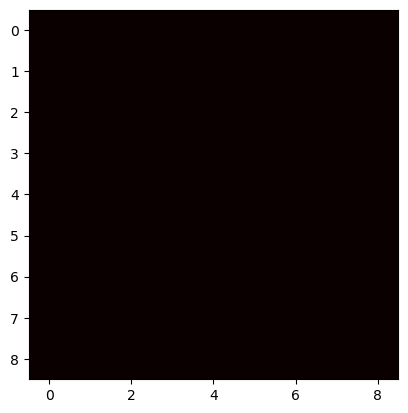

In [36]:

preds = make_predictions(board_squares, w1, b1, w2, b2, w3, b3)
print(f'{preds} \n {grid_labels}')


# actual_layout


    # print(preds_grid, "\n", actual_grid)
    

digit_acc, digit_loss = get_accuracy(preds, grid_labels)
# print(preds == grid_labels)
print(f'test accuracy : {digit_acc*100:.2f}%, {digit_loss:.2f} loss')
indexes = [j + 1 for j in range(preds.shape[0])]

map = (preds == grid_labels).reshape(9,9)
display(map)
formatted = zip(indexes, preds)
submission = pd.DataFrame(formatted, columns = ['ImageID', 'Label'])

# np.savetxt('puzzle_accuracy.csv',np.array([grid_accuracy]), fmt='%.2f')
    
submission.to_csv('puzzle.csv', index=False)
plt.imshow(map, cmap='hot')
plt.show()


# results = {
#     'hiddenlayer1 neurons' : layer2,
#     'hiddenlayer2 neurons' : layer3,
#     'mnist learning rate' : mnist_rate,
#     'digits learning rate' : digit_rate,
#     'mnist final accuracy' : mnist_acc,
#     'mnist loss' : mnist_loss,
#     'digit final accuracy' : accY[-1],
#     'digit loss' : digit_loss,
#     'puzzle accuracy' : digit_acc
# }


# preds = make_predictions(x_test, w1, b1, w2, b2, w3, b3)
# display(preds) 
# print(len(preds))
# print(len(labels_test))
# display(labels_test)


# print(results)
# data = pd.DataFrame([results], columns=None)

# data.to_csv('training.csv', mode='a')

# display(pd.DataFrame(w1, columns=None))

# weights.to_csv('weights.csv', index = False)


# best 97% : 1st train .1, 600, 2nd train .15, 800 , and rounded values for both sets

# 95% 97% : 1st train .12, 700, 2nd train .15, 1300 , and rounded values for both sets


In [ ]:
# preds_layout = []
# actual_layout = np.array([])

spacer = np.array([["-","-","-","-","-","-","-","-","-","-","-"]])
spacer2 = np.array([['|'],['|'],['|']])
pred_store = []
actual_store = []

pred_grids = {
    '1' : [],
    '2' : [],
    '3' : [],
    '4' : [],
    '5' : [],
    '6' : [],
    '7' : [],
    '8' : [],
    '9' : []
}

actual_grids = {
    '1' : [],
    '2' : [],
    '3' : [],
    '4' : [],
    '5' : [],
    '6' : [],
    '7' : [],
    '8' : [],
    '9' : []
}



for i in range(0, 9):
    preds_grid = preds[i*9:i*9+9]
    actual_grid = grid_labels[i*9:i*9+9]

    preds_grid = np.array(preds_grid).reshape(3,3).tolist()
    actual_grid = np.array(actual_grid).reshape(3,3).tolist()
    pred_grids[str(i+1)] = np.array(preds_grid).reshape(3,3)
    actual_grids[str(i+1)] = np.array(actual_grid).reshape(3,3)


def board_to_text(grids, solving=False):
    
    layer1 = grids['1']
    if not solving:
        layer1 = np.append(layer1, spacer2, axis=1)
    layer1 = np.append(layer1, grids['2'], axis=1)
    if not solving:
        layer1 = np.append(layer1, spacer2, axis=1)
    layer1 = np.append(layer1, grids['3'], axis=1)
    
    layer2 = grids['4']
    if not solving:
        layer2 = np.append(layer2, spacer2, axis=1)
    # layer2 = np.append(layer2, spacer2, axis=1)
    layer2 = np.append(layer2, grids['5'], axis=1)
    if not solving:
        layer2 = np.append(layer2, spacer2, axis=1)
    # layer2 = np.append(layer2, spacer2, axis=1)
    layer2 = np.append(layer2, grids['6'], axis=1)
    
    layer3 = grids['7']
    if not solving:
        layer3 = np.append(layer3, spacer2, axis=1)
    # layer3 = np.append(layer3,spacer2, axis=1)
    layer3 = np.append(layer3, grids['8'], axis=1)
    if not solving:
        layer3 = np.append(layer3, spacer2, axis=1)
    # layer3 = np.append(layer3, spacer2, axis=1)
    layer3 = np.append(layer3, grids['9'], axis=1)
    
    if not solving:
        layer1 = np.append(layer1, spacer, axis=0)
        layer2 = np.append(layer2, spacer, axis=0)
    
    layout = np.append(np.append(layer1, layer2, axis=0), layer3, axis=0)
    
    return layout

# layer3 = np.append(layer3, spacer, axis=0)

preds_layout = board_to_text(pred_grids)
actual_layout = board_to_text(actual_grids)

#     # print(np.array(grid).reshape(3,3))
#     grids[str(i+1)] = np.array(grid).reshape(3,3)
# print(pred_grids.reshape(3,3))
# print(grids['1'])
print('predictions: ')
print(preds_layout)
print('actual: ')
print(actual_layout)
preds_string = board_to_text(pred_grids, solving=True)
preds_string = [str(x) for x in preds_string.flatten()]
# print(preds_string)
preds_string = ' '.join(preds_string)
print(preds_string)

predictions: 
[['0' '7' '0' '|' '8' '3' '0' '|' '0' '4' '1']
 ['0' '0' '0' '|' '4' '0' '0' '|' '0' '0' '7']
 ['0' '3' '0' '|' '0' '0' '0' '|' '0' '0' '0']
 ['-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-']
 ['0' '4' '0' '|' '7' '0' '0' '|' '0' '6' '0']
 ['0' '2' '1' '|' '3' '0' '0' '|' '4' '0' '8']
 ['0' '0' '5' '|' '0' '0' '0' '|' '0' '0' '0']
 ['-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-']
 ['9' '0' '0' '|' '0' '0' '5' '|' '2' '8' '0']
 ['0' '0' '8' '|' '0' '0' '0' '|' '0' '0' '0']
 ['0' '0' '0' '|' '0' '0' '0' '|' '1' '0' '9']]
actual: 
[['0' '7' '0' '|' '8' '3' '0' '|' '0' '4' '1']
 ['0' '0' '0' '|' '4' '0' '0' '|' '0' '0' '7']
 ['0' '3' '0' '|' '0' '0' '0' '|' '0' '0' '0']
 ['-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-']
 ['0' '4' '0' '|' '7' '0' '0' '|' '0' '6' '0']
 ['0' '2' '1' '|' '3' '0' '0' '|' '4' '0' '8']
 ['0' '0' '5' '|' '0' '0' '0' '|' '0' '0' '0']
 ['-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-']
 ['9' '0' '0' '|' '0' '0' '5' '|' '2' '8' '0']
 ['0' '0' '8' '|' '0' '0' '0' '|' '0

solution: 
[[5 7 6 | 8 3 2 | 9 4 1]
 [8 9 2 | 4 6 1 | 3 5 7]
 [1 3 4 | 5 9 7 | 8 2 6]
 [- - - | - - - | - - -]
 [3 4 9 | 7 1 8 | 5 6 2]
 [7 2 1 | 3 5 6 | 4 9 8]
 [6 8 5 | 2 4 9 | 7 1 3]
 [- - - | - - - | - - -]
 [9 6 3 | 1 7 5 | 2 8 4]
 [4 1 8 | 9 2 3 | 6 7 5]
 [2 5 7 | 6 8 4 | 1 3 9]]
[[5 7 6 8 3 2 9 4 1]
 [8 9 2 4 6 1 3 5 7]
 [1 3 4 5 9 7 8 2 6]
 [3 4 9 7 1 8 5 6 2]
 [7 2 1 3 5 6 4 9 8]
 [6 8 5 2 4 9 7 1 3]
 [9 6 3 1 7 5 2 8 4]
 [4 1 8 9 2 3 6 7 5]
 [2 5 7 6 8 4 1 3 9]]


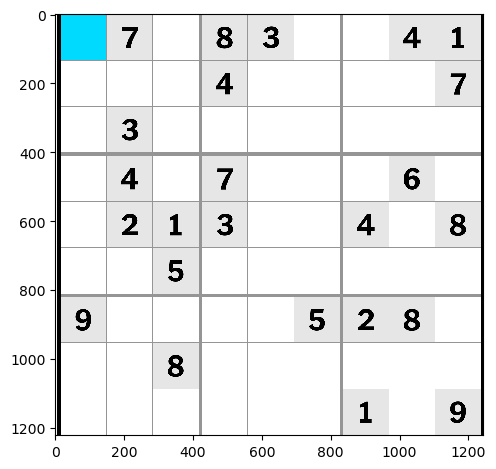

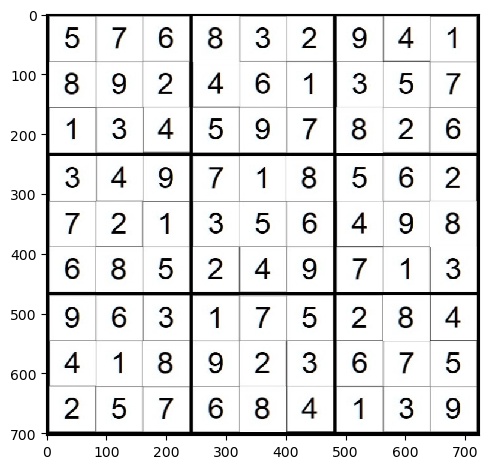

False

In [38]:
import solver
# print(len(preds_string))
puzzle = solver.parseInput(preds_string)

print('solution: ')
solved, solution, numbers = solver.solve(puzzle)
if solved:
    print(solution)
else: print('this puzzle has no solution')

print(numbers)

# display(out_rows)

def output_board(numbers):

    spacer = np.zeros((5, 724, 3))
    spacer2 = np.zeros((76,5, 3))


    out_rows = {
    '1' : [],
    '2' : [],
    '3' : [],
    '4' : [],
    '5' : [],
    '6' : [],
    '7' : [],
    '8' : [],   
    '9' : []
}
    
    for i, row in enumerate(numbers):
        output_row = spacer2
        # transform.resize(cv2.imread(f'boards/{numbers[i][0]}.jpeg'), (76,76))
        # out_rows['1'] = output_row
        for j, num in enumerate(row):
            # if j == 0: 
            #     continue
            output_row = np.append(output_row, transform.resize(cv2.imread(f'boards/{num}.jpeg'), (76,76)),  axis=1)
            # print(output_row.shape)
            if (j+1)%3 == 0:
                output_row = np.append(output_row, spacer2, axis=1)

        # print(output_row.shape)
        # io.imshow(output_row)
        # io.show()
        out_rows[str(i+1)] = output_row
            
    
    
    output = spacer
    
    # output = transform.resize(output, (76,760))
    
    # print(output.shape)
    for i in range(1,10): 
        output = np.append(output, transform.resize(out_rows[str(i)], (76,724)), axis=0)
        if i%3 == 0:
            output = np.append(output, spacer, axis=0)
    # io.imshow(output)
    # io.show()
    
    return output

out = output_board(numbers)

io.imshow(board)
io.show()
io.imshow(out)
io.show()

cv2.imwrite('frontend/images/original.png', board)
cv2.imwrite('frontend/images/solved.png', 255*out)
    
        

In [39]:
# pd.DataFrame(w1).to_csv('data/params/w1.csv', index=False)
# pd.DataFrame(b1).to_csv('data/params/b1.csv', index=False)
# pd.DataFrame(w2).to_csv('data/params/w2.csv', index=False)
# pd.DataFrame(b2).to_csv('data/params/b2.csv', index=False)
# pd.DataFrame(w3).to_csv('data/params/w3.csv', index=False)
# pd.DataFrame(b3).to_csv('data/params/b3.csv', index=False)
# display(b1)
# preds = [0 , 1, 2, 4, 5, 7, 2, 5, 8,5 ,3]
# grid_labels = [2,3,5,3,5,5,6,3,8,5]
# 
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# confusion = confusion_matrix(preds, grid_labels)
# disp = ConfusionMatrixDisplay(confusion_matrix=confusion, display_labels=[0,1,2,3,4,5,6,7,8,9])
# disp.plot(cmap='hot')


# disp.plot(c)
# plt.imshow(confusion, cmap='hot')
# plt.show()

In [40]:
training = pd.read_csv('data/results/training.csv')
display(training)

,Unnamed: 0,hiddenlayer1 neurons,hiddenlayer2 neurons,mnist learning rate,digits learning rate,mnist final accuracy,mnist loss,digit final accuracy,digit loss,puzzle accuracy
0,0.0,52,52,0.04,0.03,0.8852380952380953,-0.056857142857142856,0.6799740344044142,-1.0987654320987654,0.9135802469135802
1,NaN,hiddenlayer1 neurons,hiddenlayer2 neurons,mnist learning rate,digits learning rate,mnist final accuracy,mnist loss,digit final accuracy,digit loss,puzzle accuracy
2,0.0,52,28,0.04,0.03,0.8672380952380953,0.15276190476190477,0.6471924699772801,-3.814814814814815,0.9135802469135802
3,NaN,hiddenlayer1 neurons,hiddenlayer2 neurons,mnist learning rate,digits learning rate,mnist final accuracy,mnist loss,digit final accuracy,digit loss,puzzle accuracy
4,0.0,52,28,0.03,0.03,0.8562857142857143,0.23457142857142857,0.6815968841285297,-1.8148148148148149,0.9135802469135802
...,...,...,...,...,...,...,...,...,...,...
154,0.0,32,16,0.05,0.09,0.8182142857142857,0.6214285714285714,0.8104,-2.6296296296296298,0.8395061728395061
155,NaN,hiddenlayer1 neurons,hiddenlayer2 neurons,mnist learning rate,digits learning rate,mnist final accuracy,mnist loss,digit final accuracy,digit loss,puzzle accuracy
156,0.0,64,32,0.05,0.09,0.8982857142857142,0.10728571428571429,0.8994,-0.43209876543209874,0.9382716049382716
157,NaN,hiddenlayer1 neurons,hiddenlayer2 neurons,mnist learning rate,digits learning rate,mnist final accuracy,mnist loss,digit final accuracy,digit loss,puzzle accuracy


In [41]:
# preds = make_predictions(board_squares, w1, b1, w2, b2, w3, b3)
# print(f'{preds} \n {grid_labels}')
# grid_accuracy = get_accuracy(preds, grid_labels)
# # print(preds == grid_labels)
# print(f'test accuracy : {grid_accuracy}')
# indexes = [j + 1 for j in range(preds.shape[0])]

# map = (preds == grid_labels).reshape(9,9)
# display(map)
# display(grid_labels.reshape(9,9))
# preds = zip(indexes, preds)
# submission = pd.DataFrame(preds, columns = ['ImageID', 'Label'])

# np.savetxt('data/results/puzzle_accuracy.csv',np.array([grid_accuracy]), fmt='%.2f')
    
# submission.to_csv('puzzle.csv', index=False)
# plt.imshow(map, cmap='hot')
# plt.show()